## Step 1: Reading and Understanding the Data

In [230]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [231]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [232]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [233]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [234]:
# checking the shape of dataframe

df.shape

(730, 16)

In [235]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [236]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [237]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [238]:
## The data contains no null values. So we can now identify the redundant data and remove the same
## Lets first rename a few fields to its full form
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [239]:
# Lets drop the duplicates now
df.drop_duplicates(inplace=True)

In [240]:
df.shape

(730, 16)

In [241]:
## Shape of data is still the same so it means we did not have any duplicate data

### Lets now remove redundant data fields

In [242]:
# instant has only index for the row so it is irrelevant
# dteday has date which can be compensated by weekday, year and month colums
# casual and registered seem irrelevant as the objective of the assignment is to see the impact on value cnt based on different parameters.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [243]:
# Now let us map the categorical variables with its actual values. This will help in visualizing the data better as the integer values will be confusing during our analysis.
# Mapping the season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [244]:
# Mapping the month column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [245]:
# Mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [246]:
# Mapping the weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [247]:
# Mapping the year column
df.year = df.year.map({0:'2018',1:'2019'})

In [248]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step2 - EDA - Analysing and Visualising the Data

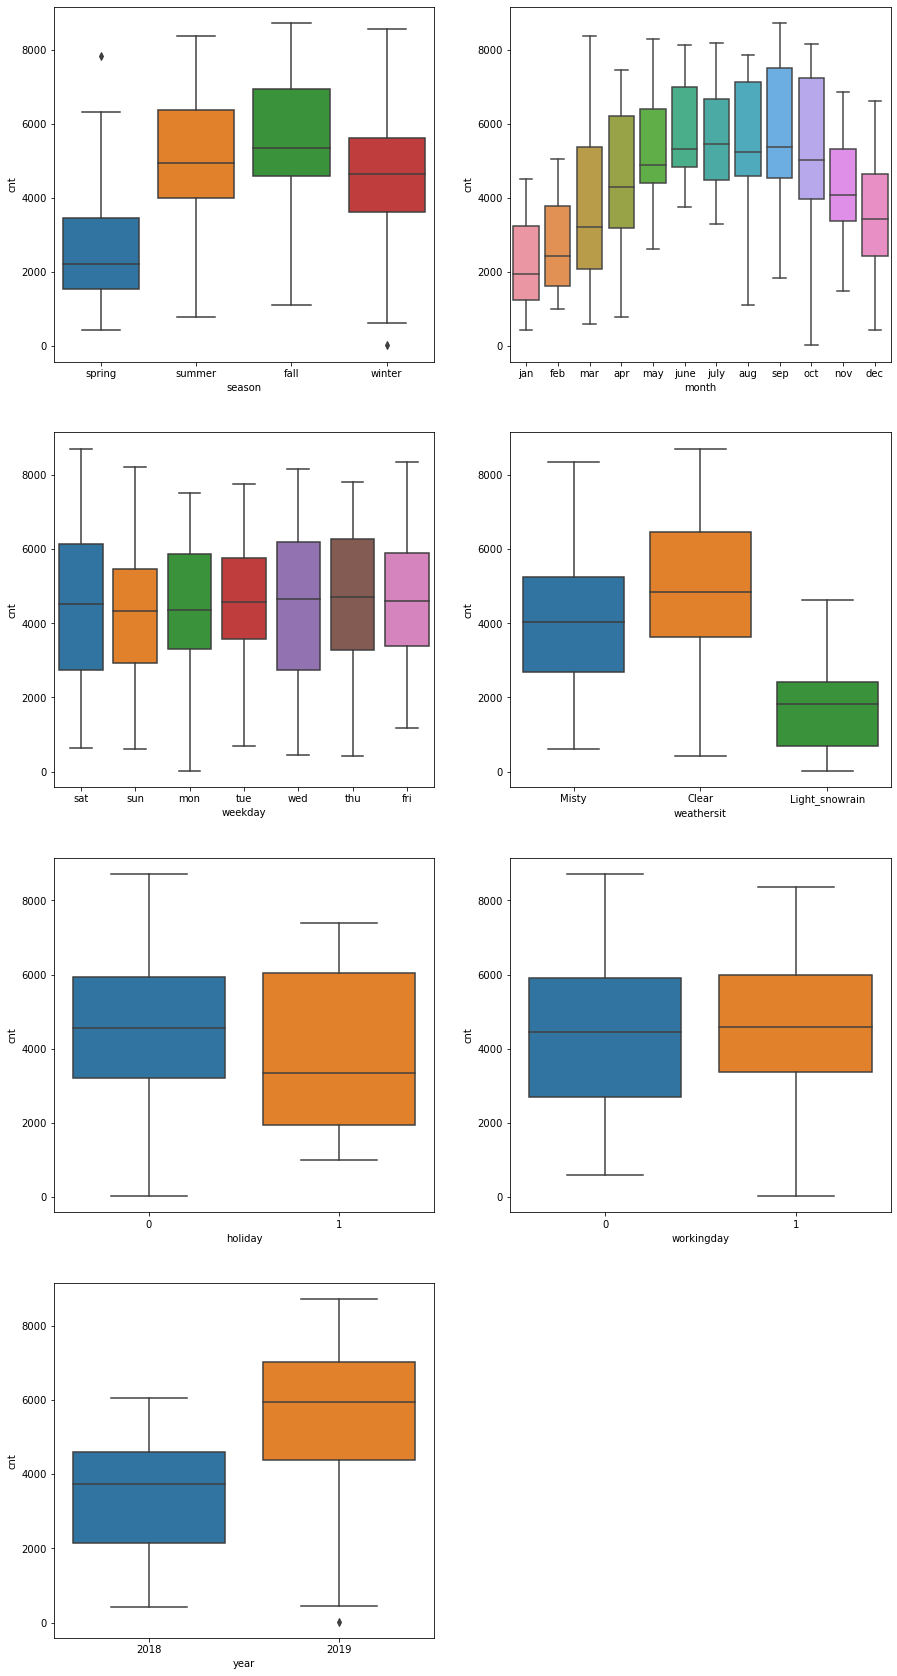

In [249]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable
plt.figure(figsize=(15, 30))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

## The above box plot shows:
### a)	Demand for bike sharing is more during summer, fall and winter seasons. Fall being the highest demand for bike sharing and spring season has lowest demand. 
### b)	Months ranging from May to October is the peak period. During this period there is huge demand for bike sharing.
### c)	People do bike sharing more during Clear weather conditions. This also shows people are more concerned about the safe climate conditions. Bike sharing might be dangerous during bad weather.
### d)	There is no significant difference of bookings based on weekend but it seems Sunday and Monday are the days which attracted lowest booking compared to the other days.
### e)	Bike bookings are more during working days compared to a holiday. Maybe some people prefer to travel with family during holidays and hence opt less for a bike sharing option.
### f)	There is a approximately 50% rise in the bookings in the year 2019 compared to the year 2018. This shows that more people are shifting towards bike sharing model to save on fuel cost. 

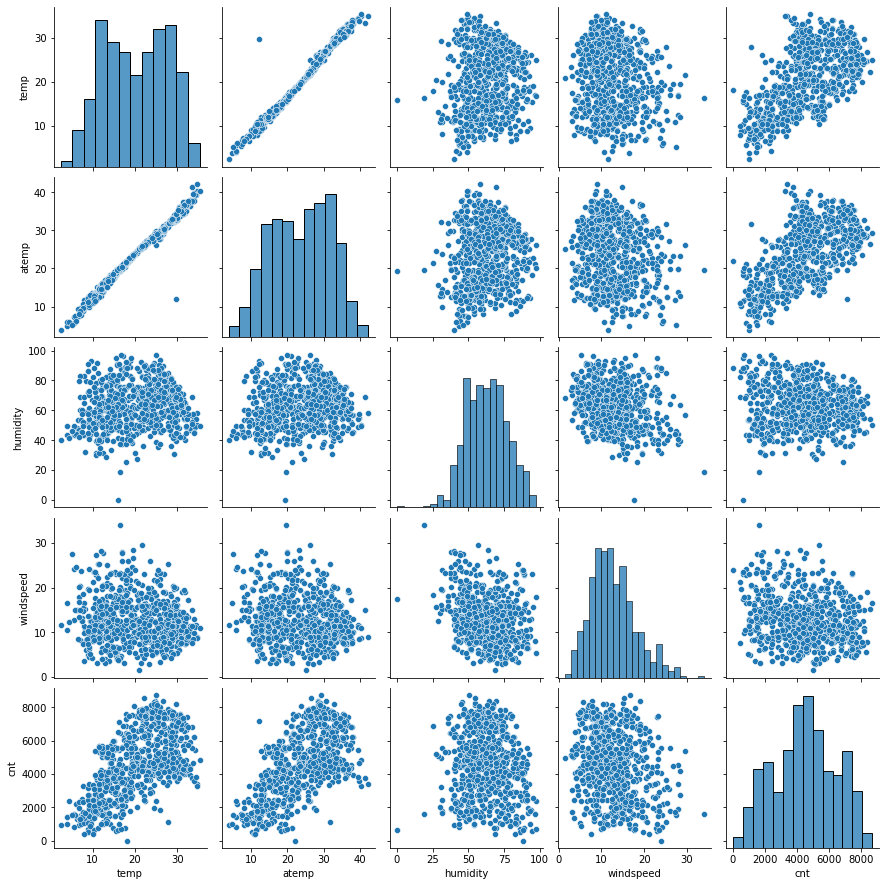

In [250]:
## Let us now analyse the numerical data
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

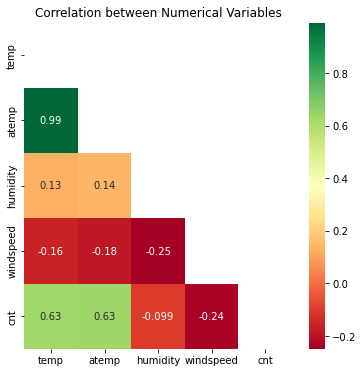

In [251]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

### From above Heatmap diagram we see there is 99% corelation between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. Let us ignore one of the variables in our analysis.


In [252]:
# Let us drop atemp from our df as it is redundant variable. Same data is also covered in temp.
df.drop(['atemp'],axis=1,inplace=True)

### Now we will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 3: Data Preparation

In [253]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [254]:
# Now let us Merge the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,2018,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,2018,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,2018,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,2018,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [255]:
#convert year back to 0 & 1
df_new.year = df_new.year.map({'2018':0,'2019':1})
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   humidity        730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [256]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
df_new.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [257]:
# check the shape of new dataframe

df_new.shape

(730, 29)

## Step 4: Split data into Training and Testing Sets

In [258]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [259]:
# check shape of train data set
df_train.shape

(510, 29)

In [260]:
# check shape of test data set
df_test.shape

(220, 29)

In [261]:
# Use MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [262]:
# verify the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,72.9583,14.707907,1683,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [263]:
# Apply scaler() to all the columns except 'dummy' variables

num_vars = ['temp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [264]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [265]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


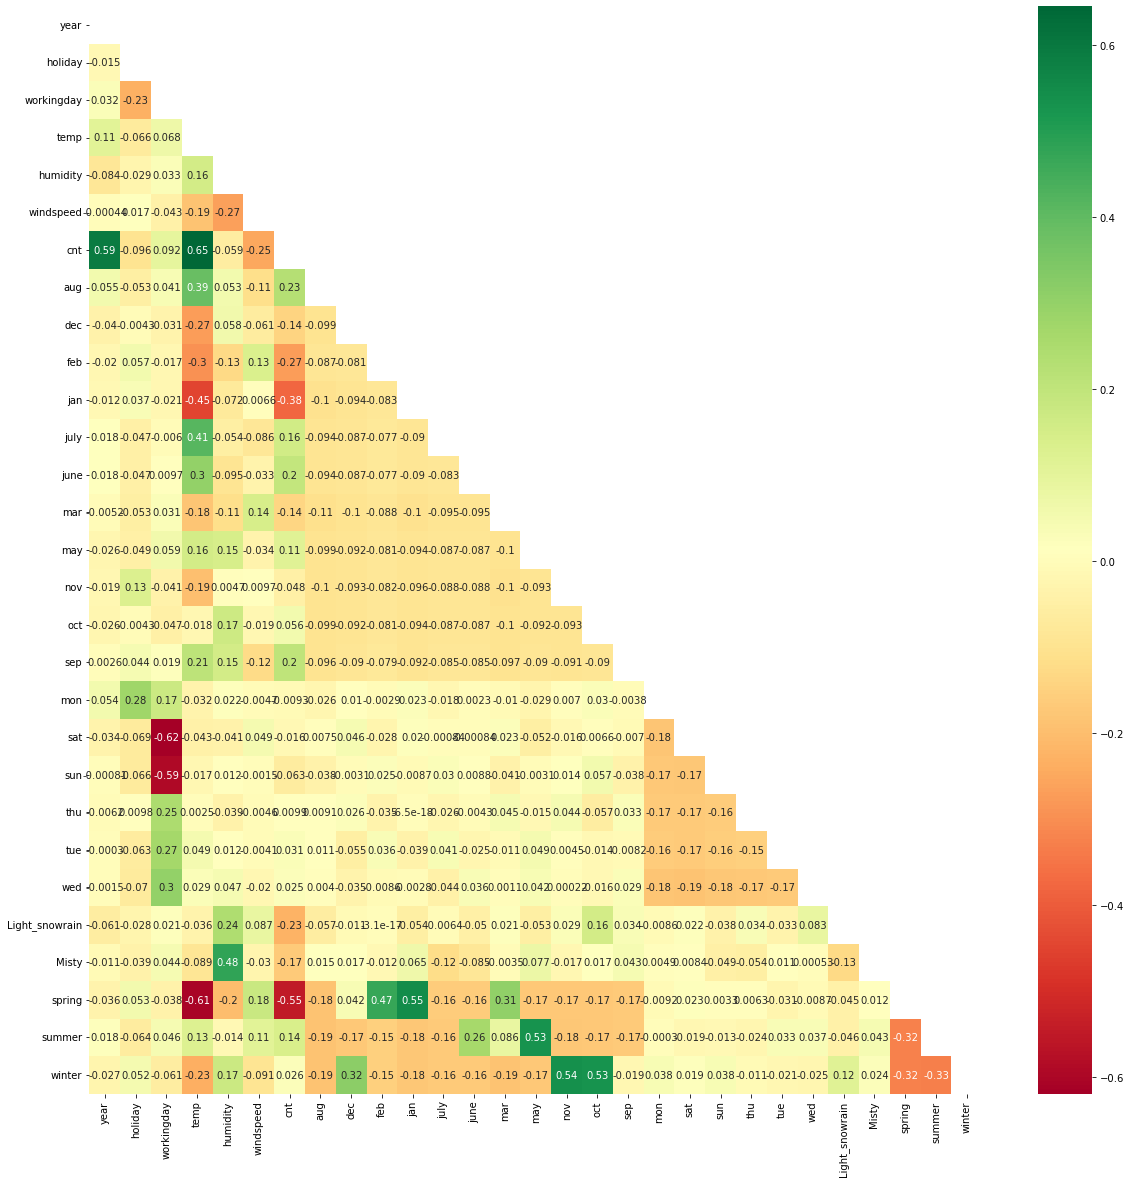

In [266]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20,20))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

### Target variable cnt seems to have strong positive correlation with temp and year. Similarly, Spring season shows a strong negative correlation.

In [267]:
#Let us build a linear model
y_train = df_train.pop('cnt')
X_train = df_train

In [268]:
# USE RSE to identify top 15 important variables
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select =15)
rfe = rfe.fit(X_train, y_train)

In [269]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 10),
 ('tue', False, 9),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [270]:
# select the selected variable via RFE rankings in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [271]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [272]:
# Update dataframe with RFE selected variables only

X_train_rfe = X_train[col]

In [273]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


In [274]:
# Humidity has a very high VIF so this needs to be removed. Lets reconfirm this by checking the P-value

## Step 5 : Build linear model

In [275]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          4.22e-191
Time:                        22:59:07   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [276]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [277]:
# VIF data is looking good for all variables
# Lets build 2nd linear model using new data frame
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.60e-188
Time:                        22:59:07   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [278]:
# holiday has a low corelation and high P value so lets drop this variable
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,year,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,july,1.59


In [279]:
# Lets build 3rd linear model using new data frame
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          8.68e-189
Time:                        22:59:07   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

In [280]:
# Jan has a high P-value and low corelation so lets drop this variable
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,sat,1.83
4,july,1.58
8,Misty,1.57


In [281]:
# Lets build 4th linear model using new data frame
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          7.12e-189
Time:                        22:59:07   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

In [282]:
# july has low corelation so lets drop this variable
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Misty,1.57
4,sep,1.23


In [283]:
# Lets build 5th linear model using new data frame
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.42e-188
Time:                        22:59:07   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

In [284]:
# spring has low corelation so lets drop this variable
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.66
3,windspeed,4.59
1,workingday,3.02
7,spring,2.12
0,year,2.07
8,summer,1.95
9,winter,1.67
6,Misty,1.56
4,sep,1.23
5,Light_snowrain,1.08


In [285]:
# Lets build 6th linear model using new data frame
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          3.59e-185
Time:                        22:59:07   Log-Likelihood:                 491.56
No. Observations:                 510   AIC:                            -961.1
Df Residuals:                     499   BIC:                            -914.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1735      0.030      5.

In [286]:
# sat has low corelation so lets drop this variable
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.28
3,windspeed,3.16
1,workingday,2.82
0,year,2.01
7,summer,1.57
6,Misty,1.51
8,winter,1.38
4,sep,1.20
5,Light_snowrain,1.08


In [287]:
# Lets build 7th linear model using new data frame
X_train_lm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          8.61e-185
Time:                        22:59:08   Log-Likelihood:                 487.77
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     500   BIC:                            -913.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1060      0.018      5.

#### We can consider the above model i.e lr_7, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
### F-Statistics value of 267.4 (which is greater than 1) and the Prob (F-statistic) is 8.61e-185 i.e almost equals to zero, also the r2 value is 0.828 which is a very good value. Hence the overall model is significant

In [288]:
# Checking the parameters and their coefficient values
lr_7.params

const             0.105974
year              0.232546
workingday        0.023633
temp              0.550339
windspeed        -0.152422
sep               0.097651
Light_snowrain   -0.281257
Misty            -0.077875
summer            0.088658
winter            0.129404
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [289]:
#plot data frame for model 7
X_train_lm_7

,const,year,workingday,temp,windspeed,sep,Light_snowrain,Misty,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,1,0
111,1.0,0,1,0.345824,0.380981,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,1,1,0


In [290]:
#use the model to predict the y values
y_train_pred = lr_7.predict(X_train_lm_7)

Text(0.5, 0, 'Errors')

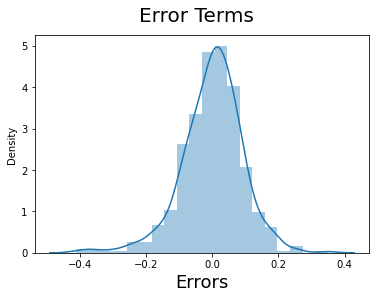

In [291]:
# find normality of error terms
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### The data is normally distributed. This looks good.

In [292]:
# Check for Multi-Colinearity
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.28
3,windspeed,3.16
1,workingday,2.82
0,year,2.01
7,summer,1.57
6,Misty,1.51
8,winter,1.38
4,sep,1.20
5,Light_snowrain,1.08


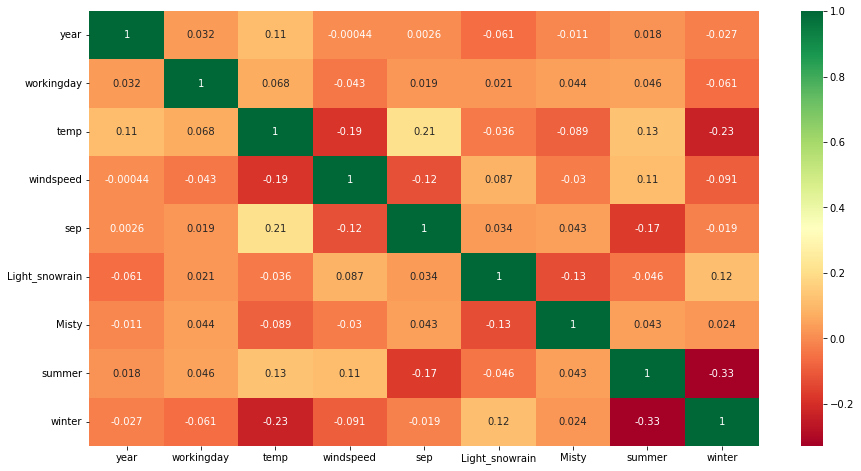

In [293]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

### Heatmap data also shows there is no Multi-colinearity between different parameters

### Also Durbin-Watson value of final model lr_7 is 2.058, which signifies there is no auto-correlation.

## Step 7: Making Predictions Using the Final Model

In [294]:
# Applying scaling on the test dataset
num_vars = ['temp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [295]:
y_test = df_test.pop('cnt')
X_test = df_test

In [296]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_7 = sm.add_constant(X_test)

In [297]:
y_pred = lr_7.predict(X_test_lm_7)

In [298]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7925

####The r2 is around 0.79 which is good.

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

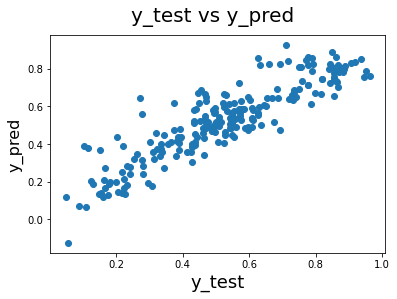

In [299]:
#Let's now plot the graph for actual versus predicted values.
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [300]:
round(lr_7.params,4)

const             0.1060
year              0.2325
workingday        0.0236
temp              0.5503
windspeed        -0.1524
sep               0.0977
Light_snowrain   -0.2813
Misty            -0.0779
summer            0.0887
winter            0.1294
dtype: float64

### So the equation for our model is
#### cnt = 0.1259 + 0.2329 * year - 0.0987 * holiday + 0.5480 * temp - 0.1532 * windspeed + 0.1012 * sep - 0.2829 * Light_snowrain - 0.0784 * Misty + 0.0881 * summer + 0.1293 * winter

In [301]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7836


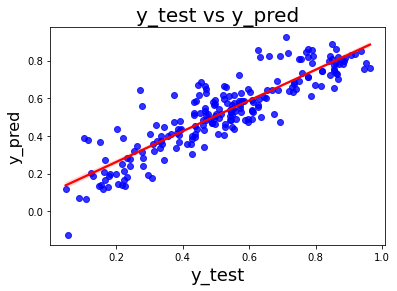

In [302]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparision between Training and Testing dataset:

In [304]:
# Train dataset R^2          : 0.826
# Test dataset R^2           : 0.7925
# Train dataset Adjusted R^2 : 0.823    
# Test dataset Adjusted R^2  : 0.7836

### The above analysis concludes that the demand for bikes is high during below situations:
- 1) Temperature conditions are better (i.e. in the range of 10 to 30)
- 2) Windspeed is less (since there is a negative correlation with windspeed)
- 3) Demand for bikes is higher during summer, fall and winter seasons.
- 4) People prefer bike sharing  when the climate condition is clear (no heavy rains, no thunderstorms,no snow etc.)
- 5) Working day the demand is higher as people generally opt for bike sharing with office colleagues. Where as during holiday they prefer to go by personal vehicles with family or friends.
- 6) There is negative correlation of bike sharing during misty climate because people fear accidents due to bad vision during foggy climate.
- 7) Also we can see a negative correlation of bike sharing during light snow rains.